### Method 2 - Using zsts

In [1]:
# Importing necessary libraries

import praw
import pandas as pd
from datetime import datetime
import numpy as np
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [4]:
import zstandard as zstd
import json

file_path = "TSLA_submissions.zst"

def load_zst_to_dataframe(file_path):
    records = []
    with open(file_path, 'rb') as file_handle:
        dctx = zstd.ZstdDecompressor()
        with dctx.stream_reader(file_handle) as reader:
            buffer = b""
            while True:
                chunk = reader.read(2**20)
                if not chunk:
                    break
                buffer += chunk
                lines = buffer.split(b"\n")
                buffer = lines.pop()
                for line in lines:
                    if line.strip():
                        try:
                            records.append(json.loads(line))
                        except json.JSONDecodeError:
                            print(f"Failed to decode line: {line}")

    df = pd.DataFrame(records)
    return df

df_TSLA = load_zst_to_dataframe(file_path)

print(df_TSLA.head())

  secure_media_embed                                              title  \
0                 {}  Tesla’s Stock Suffers Power Failure After Elon...   
1                 {}                 Tesla Won’t Turn Profit Until 2020   
2                 {}                                 Tesla Gets Crushed   
3                 {}  Tesla Announces Release Date for Fourth Quarte...   
4                 {}  Tesla Motors, Inc. Second Quarter 2015 Financi...   

                                           thumbnail  downs distinguished  \
0  http://a.thumbs.redditmedia.com/L5-V6adJ0qfviN...    0.0          None   
1  http://b.thumbs.redditmedia.com/o3mQN8IZ1u__Fg...    0.0          None   
2  http://b.thumbs.redditmedia.com/aJr0mJ3y2h70w3...    0.0          None   
3                                            default    0.0          None   
4                                            default    0.0          None   

   hide_score               domain author_flair_text created_utc subreddit  \
0       

In [5]:
file_path = "AMD_Stock_submissions.zst"

def load_zst_to_dataframe(file_path):
    records = []
    with open(file_path, 'rb') as file_handle:
        dctx = zstd.ZstdDecompressor()
        with dctx.stream_reader(file_handle) as reader:
            buffer = b""
            while True:
                chunk = reader.read(2**20)
                if not chunk:
                    break
                buffer += chunk
                lines = buffer.split(b"\n")
                buffer = lines.pop()
                for line in lines:
                    if line.strip():
                        try:
                            records.append(json.loads(line))
                        except json.JSONDecodeError:
                            print(f"Failed to decode line: {line}")

    df = pd.DataFrame(records)
    return df

df_AMD = load_zst_to_dataframe(file_path)

print(df_AMD.head())

  media                                                url post_hint  \
0  None                 https://i.redd.it/dh1jlg8or6jx.jpg     image   
1  None  https://www.reddit.com/r/AMD_Stock/comments/51...       NaN   
2  None  https://www.reddit.com/r/AMD_Stock/comments/51...       NaN   
3  None  https://www.reddit.com/r/AMD_Stock/comments/51...       NaN   
4  None  https://www.reddit.com/r/AMD_Stock/comments/51...      self   

  secure_media  is_self archived subreddit_id media_embed  contest_mode  \
0         None    False    False     t5_3fr05          {}         False   
1         None     True    False     t5_3fr05          {}         False   
2         None     True    False     t5_3fr05          {}         False   
3         None     True    False     t5_3fr05          {}         False   
4         None     True    False     t5_3fr05          {}         False   

  distinguished  ...  gallery_data is_gallery event_end  event_is_live  \
0          None  ...           NaN        

### Getting datasets from 'yfinance'

In [7]:
import yfinance as yf
import pandas as pd

symbols = ['TSLA', 'AMD']

interval = '1d'
period = '10y'

dfs = {}

for symbol in symbols:
    dfs[symbol] = yf.download(symbol, interval=interval, period=period)
    
    dfs[symbol].index.name = 'Date'
    
    dfs[symbol].index = pd.to_datetime(dfs[symbol].index, format='%Y-%m-%d %H:%M:%S')
    
    dfs[symbol] = dfs[symbol].sort_index()
    
    dfs[symbol].columns = ['Close', 'High', 'Low', 'Open', 'Volume']
    
    print(f"Data for {symbol}:")
    print(dfs[symbol].head())
    print("\n")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data for TSLA:
                Close       High        Low       Open     Volume
Date                                                             
2015-01-14  12.846000  13.013333  12.333333  12.388667  173278500
2015-01-15  12.791333  13.050000  12.666667  12.966000   78247500
2015-01-16  12.871333  12.966000  12.643333  12.713333   54048000
2015-01-20  12.795333  12.941333  12.469333  12.924667   67548000
2015-01-21  13.104667  13.245333  12.634000  12.636667   62295000


Data for AMD:
            Close  High   Low  Open    Volume
Date                                         
2015-01-14   2.63  2.66  2.58  2.60   9989900
2015-01-15   2.52  2.65  2.49  2.62  17744000
2015-01-16   2.39  2.53  2.39  2.52  30192400
2015-01-20   2.24  2.43  2.19  2.39  56713300
2015-01-21   2.45  2.45  2.14  2.18  46530800




### Data visualization of stock prices

#### Tesla

Text(0.5, 1.0, 'Tesla Stock')

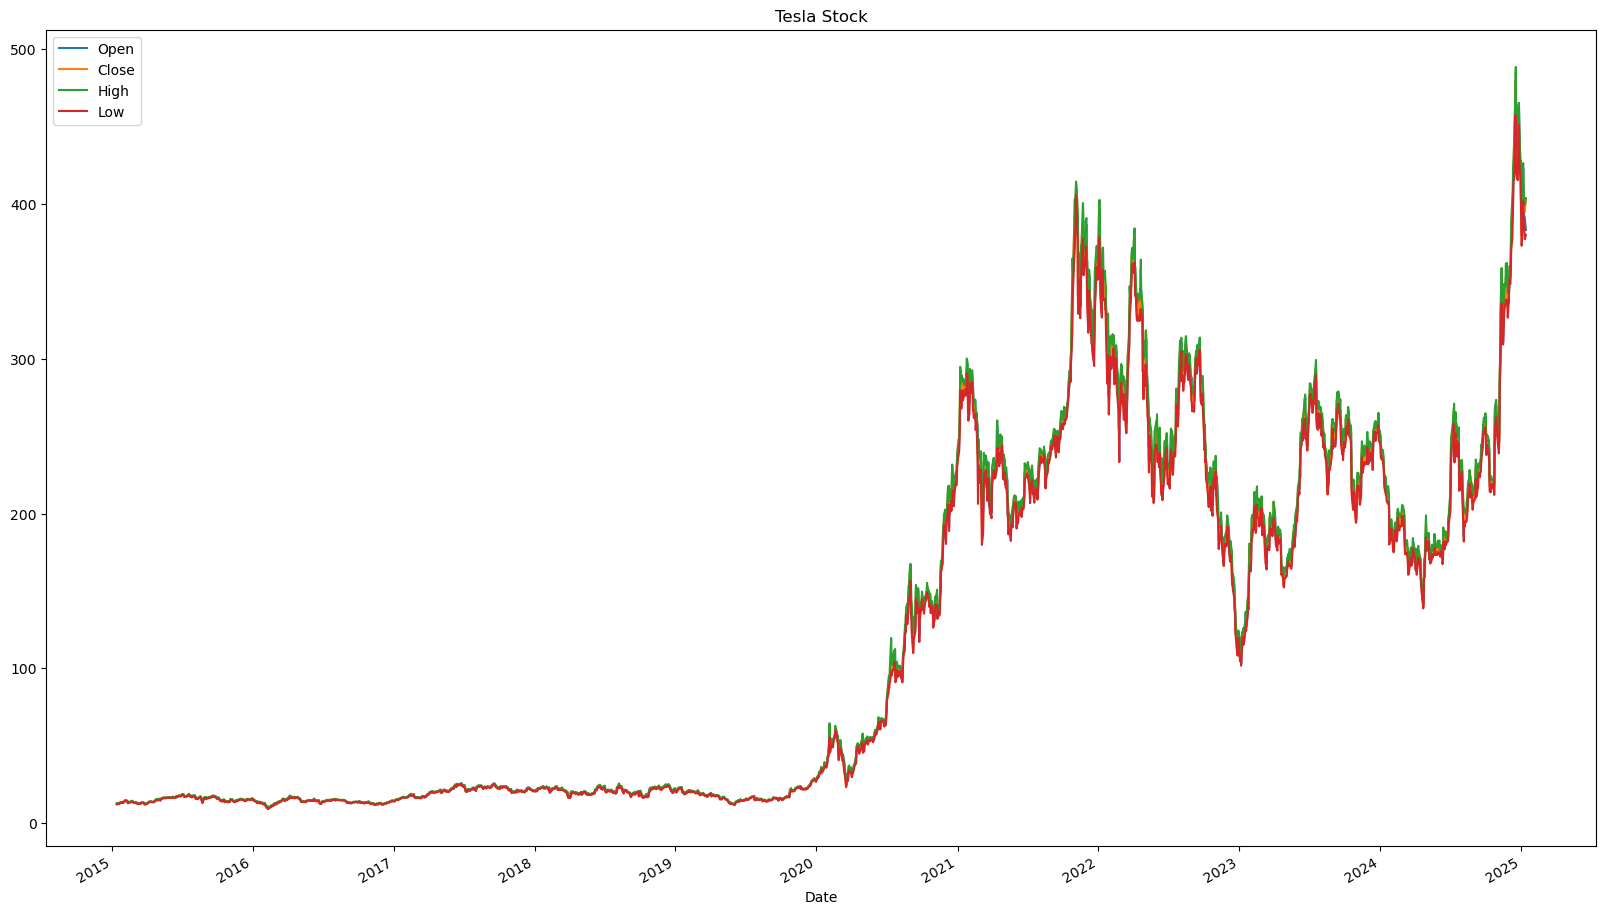

In [10]:
import matplotlib.pyplot as plt
dfs['TSLA'][['Open','Close','High','Low']].plot(figsize = (20,12))
plt.title('Tesla Stock')

#### AMD

Text(0.5, 1.0, 'AMD Stock')

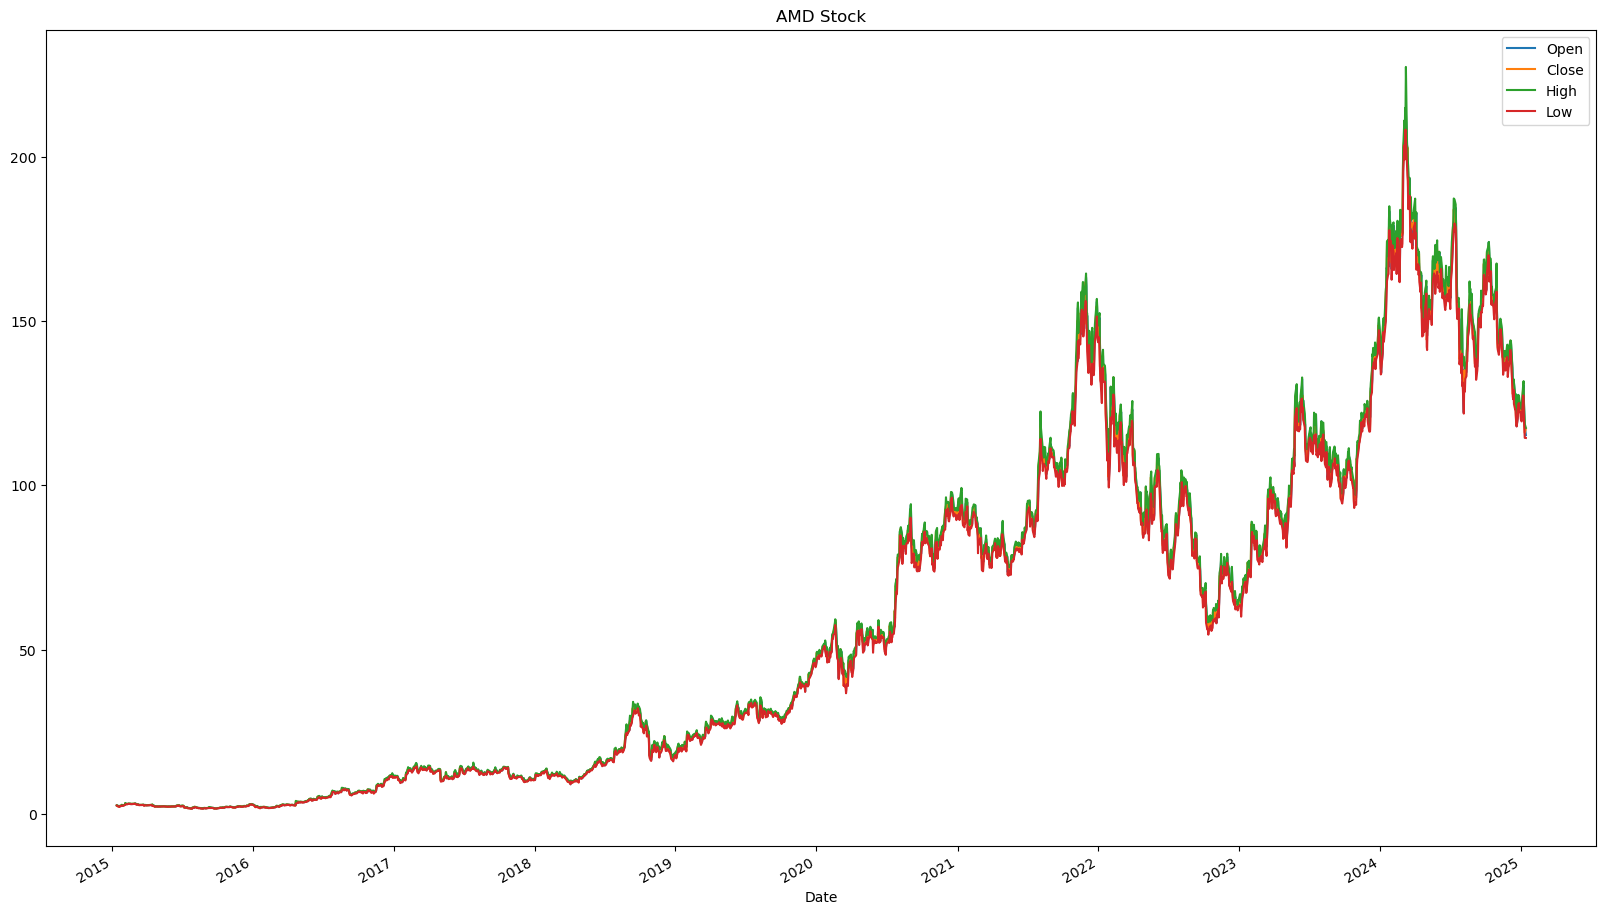

In [12]:
dfs['AMD'][['Open','Close','High','Low']].plot(figsize = (20,12))
plt.title('AMD Stock')

In [13]:
dfs['TSLA'].describe()

,Close,High,Low,Open,Volume
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,116.789606,119.385562,114.056910,116.803335,1.123542e+08
std,115.071334,117.751250,112.277964,115.138148,7.406472e+07
min,9.578000,10.331333,9.403333,9.488000,1.062000e+07
25%,17.291333,17.548667,16.952666,17.275000,6.681690e+07
50%,29.671333,31.456667,29.333332,29.366667,9.286500e+07
75%,220.889999,226.231667,216.273331,221.570000,1.298032e+08
max,479.859985,488.540009,457.510010,475.899994,9.140820e+08


In [14]:
dfs['AMD'].describe()

,Close,High,Low,Open,Volume
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,58.895551,60.080537,57.693312,58.928616,5.802883e+07
std,52.365780,53.402687,51.341108,52.443058,3.628345e+07
min,1.620000,1.690000,1.610000,1.620000,2.606600e+06
25%,11.690000,12.010000,11.430000,11.665000,3.522585e+07
50%,44.630001,46.090000,43.160000,44.189999,5.144250e+07
75%,96.824997,98.689999,94.704998,96.825001,7.524250e+07
max,211.380005,227.300003,208.220001,213.410004,3.250584e+08


### Tesla

In [16]:
df_TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Columns: 126 entries, secure_media_embed to _meta
dtypes: bool(6), float64(34), int64(3), object(83)
memory usage: 2.8+ MB


In [17]:
df_TSLA.to_csv("TSLA.csv", index=False)

In [18]:
df_TSLA['date'] = pd.to_datetime(df_TSLA['created_utc'], unit='s').dt.date

C:\Users\User\AppData\Local\Temp\ipykernel_16212\1042829514.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_TSLA['date'] = pd.to_datetime(df_TSLA['created_utc'], unit='s').dt.date


In [19]:
df_TSLA = df_TSLA[['date', 'title']]

In [20]:
df_TSLA.rename(columns={'date': 'Date', 'title': 'Title'}, inplace=True)

In [21]:
sent_df_TSLA = df_TSLA.copy()
sent_df_TSLA["Sentiment_score"] = ''
sent_df_TSLA["Negative"] = ''
sent_df_TSLA["Neutral"] = ''
sent_df_TSLA["Positive"] = ''
sent_df_TSLA.head()

,Date,Title,Sentiment_score,Negative,Neutral,Positive
0,2015-01-14,Tesla’s Stock Suffers Power Failure After Elon...,,,,
1,2015-01-14,Tesla Won’t Turn Profit Until 2020,,,,
2,2015-01-14,Tesla Gets Crushed,,,,
3,2015-01-29,Tesla Announces Release Date for Fourth Quarte...,,,,
4,2015-07-31,"Tesla Motors, Inc. Second Quarter 2015 Financi...",,,,


In [22]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
import unicodedata
from nltk.sentiment import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer()
for indx, row in sent_df_TSLA.iterrows():
    try:
        sentence_i = unicodedata.normalize('NFKD', sent_df_TSLA.loc[indx, 'Title'])
        sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
        sent_df_TSLA.at[indx, 'Sentiment_score'] = sentence_sentiment['compound']
        sent_df_TSLA.at[indx, 'Negative'] = sentence_sentiment['neg']
        sent_df_TSLA.at[indx, 'Neutral'] = sentence_sentiment['neu']
        sent_df_TSLA.at[indx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print (sent_df_TSLA.loc[indx, 'Title'])
        print (indx)
        break

In [24]:
sent_df_TSLA = sent_df_TSLA.drop(columns=['Negative', 'Positive', 'Neutral', 'Title'])

In [25]:
sent_df_TSLA = sent_df_TSLA.groupby([sent_df_TSLA['Date']]).mean()
print(sent_df_TSLA.shape)

(945, 1)


In [26]:
sent_df_TSLA.index

Index([2015-01-14, 2015-01-29, 2015-07-31, 2015-08-13, 2020-09-29, 2020-09-30,
       2020-10-01, 2020-10-03, 2020-10-04, 2020-10-05,
       ...
       2023-12-16, 2023-12-17, 2023-12-18, 2023-12-19, 2023-12-20, 2023-12-21,
       2023-12-22, 2023-12-26, 2023-12-27, 2023-12-28],
      dtype='object', name='Date', length=945)

In [27]:
sent_df_TSLA.index = pd.to_datetime(sent_df_TSLA.index)

In [28]:
start_date = '2020-09-29'
end_date = '2023-12-28'

dfs['TSLA'] = dfs['TSLA'].loc[start_date:end_date]

In [29]:
final_df_TSLA = dfs['TSLA'].join(sent_df_TSLA, how="left", on="Date")
print(final_df_TSLA.shape)

(818, 6)


In [30]:
final_df_TSLA = final_df_TSLA.reset_index()

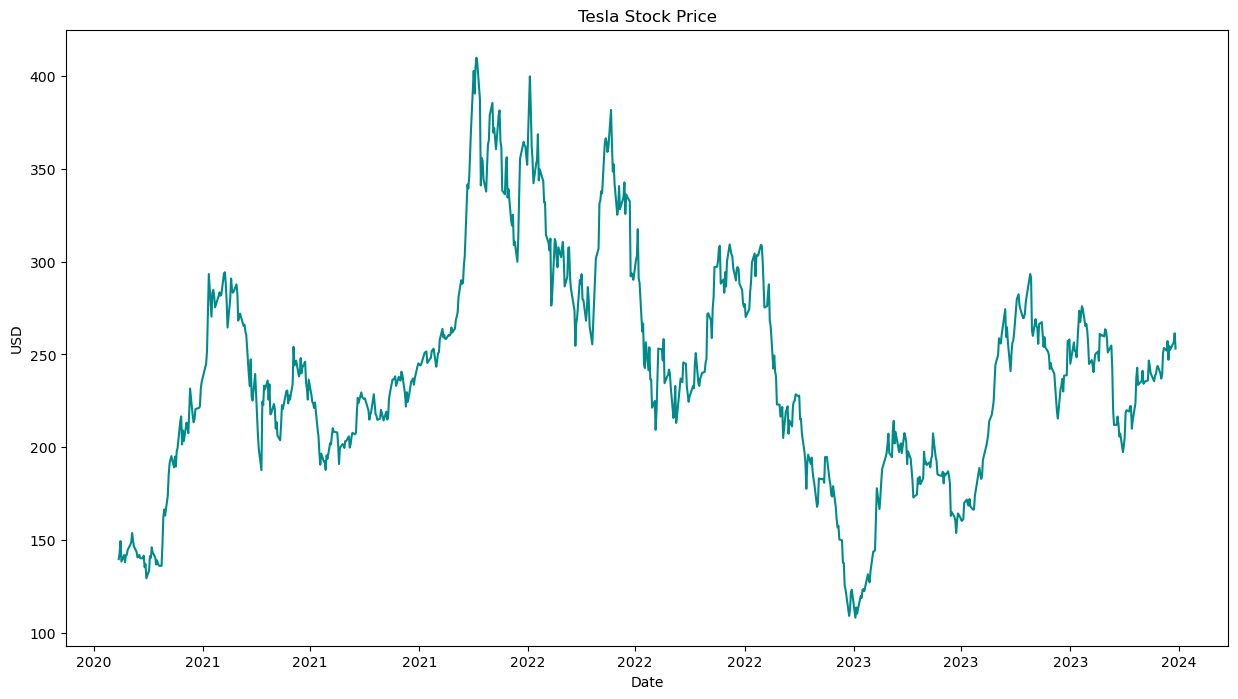

In [31]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(final_df_TSLA['Date'], final_df_TSLA['Close'], color='#008B8B')
ax.set(xlabel="Date", ylabel="USD", title=f"Tesla Stock Price")
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
plt.show()

In [32]:
final_df_TSLA.iloc[:, 1:] = pd.concat([final_df_TSLA.iloc[:, 1:].ffill()])

C:\Users\User\AppData\Local\Temp\ipykernel_16212\974426433.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df_TSLA.iloc[:, 1:] = pd.concat([final_df_TSLA.iloc[:, 1:].ffill()])


In [33]:
final_df_TSLA = final_df_TSLA.drop(index=0).reset_index(drop=True)

In [34]:
Tesla = final_df_TSLA[['Close', 'Sentiment_score']]

X_Tesla = []
y_Tesla = []


for i in range(2, len(Tesla)):
    
    X_Tesla.append(Tesla.iloc[i-2:i][['Close', 'Sentiment_score']].values)  
    y_Tesla.append(Tesla['Close'].iloc[i])    

# Converting the lists into numpy arrays with float type
X_Tesla = np.array(X_Tesla, dtype=float)  # Shape: (samples, 2, 2)
y_Tesla = np.array(y_Tesla, dtype=float)  # Shape: (samples,)

# Checking for any missing values
if np.isnan(X_Tesla).any() or np.isnan(y_Tesla).any():
    raise ValueError("Input data contains NaN values. Please handle missing data before training.")

# Checking the shapes of the arrays to confirm correctness
print("Shape of X_Tesla:", X_Tesla.shape)  # Expected: (n, 2, 2)
print("Shape of y_Tesla:", y_Tesla.shape)  # Expected: (n,)

Shape of X_Tesla: (815, 2, 2)
Shape of y_Tesla: (815,)


In [35]:
# Determining the training length (80% of the data)
train_len_Tesla = math.ceil(len(Tesla) * 0.8)
print("Training samples:", train_len_Tesla)

Training samples: 654


In [36]:
X_Tesla_train,y_Tesla_train = X_Tesla[:train_len_Tesla],y_Tesla[:train_len_Tesla]

In [37]:
X_Tesla_train.shape

(654, 2, 2)

In [38]:
# Defining the LSTM model with correct input_shape
model_Tesla = Sequential()
model_Tesla.add(LSTM(50, activation='relu', input_shape=(X_Tesla_train.shape[1], X_Tesla_train.shape[2])))
model_Tesla.add(Dense(25))
model_Tesla.add(Dense(1))

# Compiling the model
model_Tesla.compile(loss='mean_squared_error', optimizer='adam')

# Displaying the model summary
model_Tesla.summary()

# Training the model
model_Tesla.fit(X_Tesla_train, y_Tesla_train, epochs=20, batch_size=32, verbose=2)

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,901 (46.49 KB)

 Trainable params: 11,901 (46.49 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
21/21 - 2s - 115ms/step - loss: 33360.5156
Epoch 2/20
21/21 - 0s - 6ms/step - loss: 13214.4102
Epoch 3/20
21/21 - 0s - 6ms/step - loss: 427.2274
Epoch 4/20
21/21 - 0s - 8ms/step - loss: 136.6662
Epoch 5/20
21/21 - 0s - 7ms/step - loss: 121.4430
Epoch 6/20
21/21 - 0s - 7ms/step - loss: 119.1233
Epoch 7/20
21/21 - 0s - 4ms/step - loss: 118.1769
Epoch 8/20
21/21 - 0s - 8ms/step - loss: 118.7241
Epoch 9/20
21/21 - 0s - 8ms/step - loss: 118.4395
Epoch 10/20
21/21 - 0s - 7ms/step - loss: 118.4464
Epoch 11/20
21/21 - 0s - 8ms/step - loss: 119.1020
Epoch 12/20
21/21 - 0s - 8ms/step - loss: 120.0979
Epoch 13/20
21/21 - 0s - 7ms/step - loss: 117.0066
Epoch 14/20
21/21 - 0s - 8ms/step - loss: 117.2788
Epoch 15/20
21/21 - 0s - 8ms/step - loss: 118.7471
Epoch 16/20
21/21 - 0s - 7ms/step - loss: 114.7652
Epoch 17/20
21/21 - 0s - 8ms/step - loss: 110.3641
Epoch 18/20
21/21 - 0s - 5ms/step - loss: 107.7254
Epoch 19/20
21/21 - 0s - 6ms/step - loss: 102.3072
Epoch 20/20
21/21 - 0s - 7ms/step 

In [39]:
X_Tesla_test,y_Tesla_test = X_Tesla[train_len_Tesla-2:],y_Tesla[train_len_Tesla-2:]

In [40]:
X_Tesla_test.shape

(163, 2, 2)

In [41]:
y_Tesla_test.shape

(163,)

<Axes: >

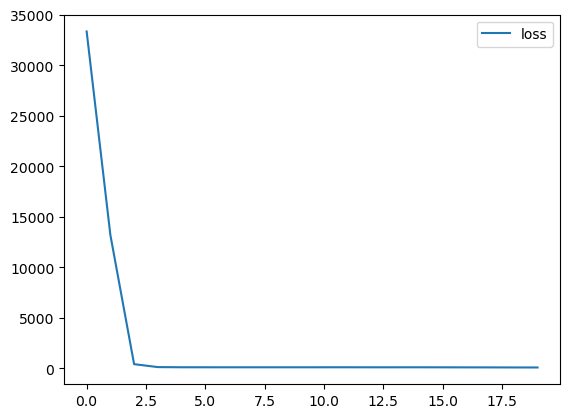

In [42]:
losses_Tesla = pd.DataFrame(model_Tesla.history.history)
losses_Tesla[['loss']].plot()

In [43]:
prediction_Tesla = model_Tesla.predict(X_Tesla_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

print('Test RMSE for Tesla:', np.sqrt(mean_squared_error(y_Tesla_test, prediction_Tesla)))
print('Test MAPE for Tesla:', np.sqrt(mean_absolute_percentage_error(y_Tesla_test, prediction_Tesla)))

Test RMSE for Tesla: 7.536970070660667
Test MAPE for Tesla: 0.1544843216472902


In [45]:
# Modelling accuracy checking

lstm_train_pred_Tesla = model_Tesla.predict(X_Tesla_train)
lstm_test_pred_Tesla = model_Tesla.predict(X_Tesla_test)
print('Train rmse for Tesla:', np.sqrt(mean_squared_error(y_Tesla_train, lstm_train_pred_Tesla)))
print('Test rmse for Tesla:', np.sqrt(mean_squared_error(y_Tesla_test, lstm_test_pred_Tesla)))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Train rmse for Tesla: 9.842085198773017
Test rmse for Tesla: 7.536970070660667


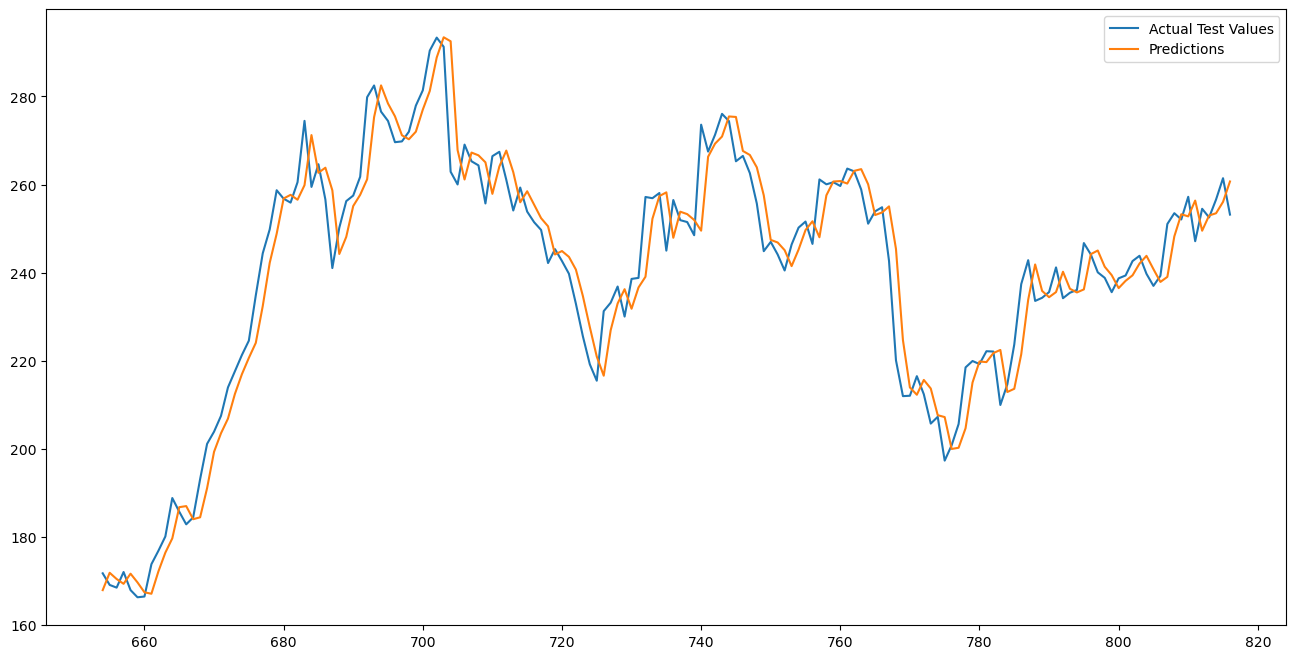

In [46]:
# Plotting the test and the prediction values 

x=df_TSLA.iloc[-len(y_Tesla_test):]['Date'].values
test_Tesla = pd.DataFrame(Tesla[train_len_Tesla:])
test_Tesla['Predictions']=lstm_test_pred_Tesla
plt.figure(figsize=(16,8))
# plt.plot(x ,test_Tesla['Close'] )
# plt.plot(x ,test_Tesla['Predictions'] )
plt.plot(test_Tesla[['Close','Predictions']])
plt.legend(['Actual Test Values','Predictions'])
plt.show()

In [47]:
# Resetting the index to default integers

test_Tesla = test_Tesla.reset_index(drop=True)

variance_Tesla = []
for i in range(len(test_Tesla)):
    variance = test_Tesla['Close'][i] - test_Tesla['Predictions'][i]
    variance_Tesla.append(variance)

# Converting the list to a DataFrame
variance_Tesla = pd.DataFrame(variance_Tesla, columns=['Variance'])

# Outputting descriptive statistics
print(variance_Tesla.describe())

         Variance
count  163.000000
mean     0.410397
std      7.548980
min    -29.605408
25%     -3.910133
50%      0.698792
75%      4.788963
max     24.045563


### Visualization of train, test and the prediction values in a single plot

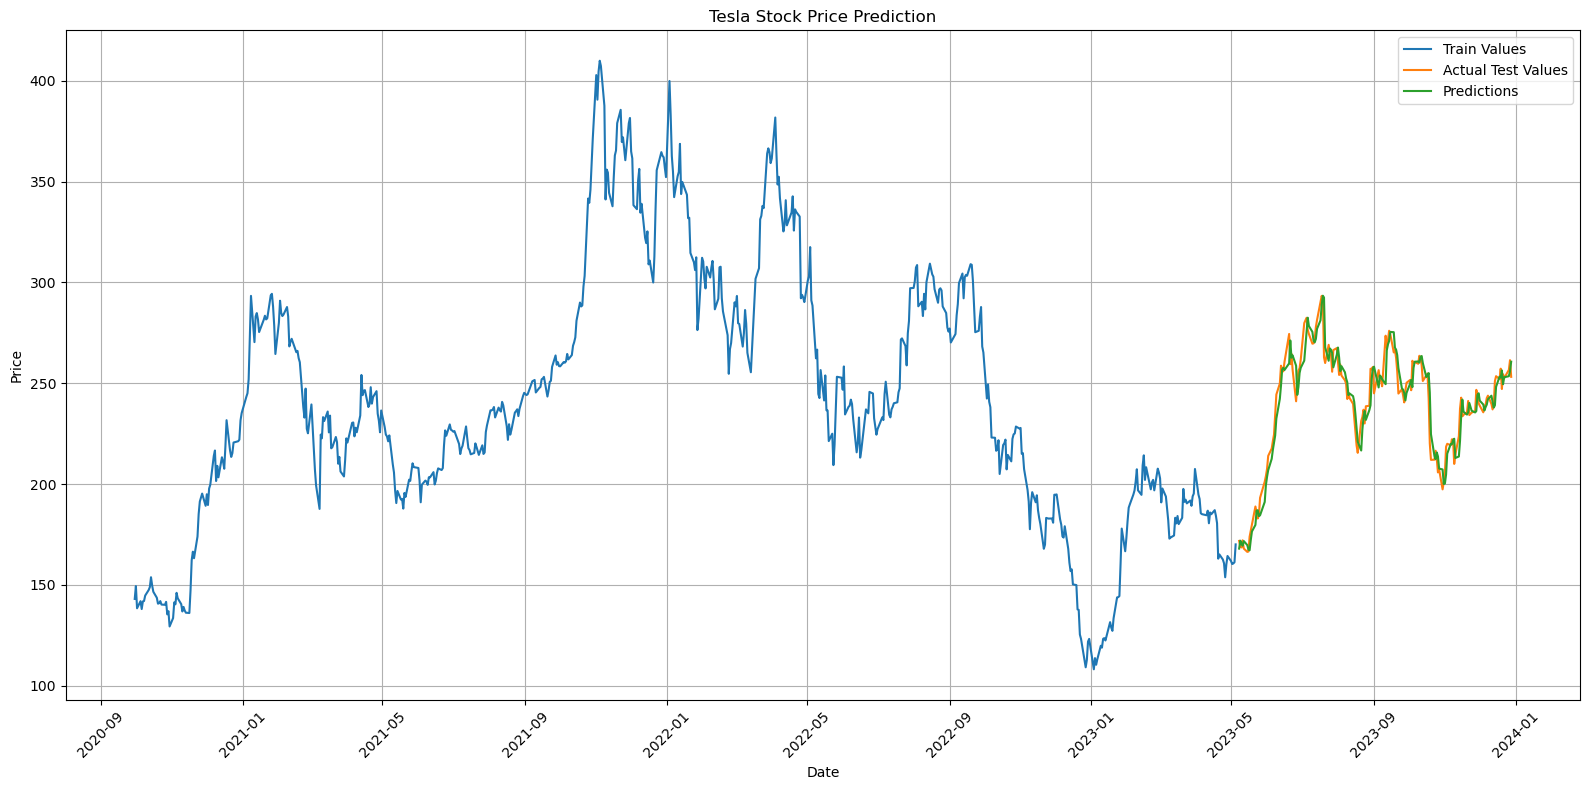

In [49]:
# Creating a dataframe to store actual and predicted values
train_Tesla = pd.DataFrame(Tesla[:train_len_Tesla])
train_Tesla['Date'] = final_df_TSLA.iloc[:train_len_Tesla]['Date'].values
train_Tesla['Type'] = 'Train'
 
test_Tesla = pd.DataFrame(Tesla[train_len_Tesla:])
test_Tesla['Date'] = final_df_TSLA.iloc[train_len_Tesla:]['Date'].values
test_Tesla['Type'] = 'Test'
test_Tesla['Predictions'] = lstm_test_pred_Tesla
 
# Creating the plot
plt.figure(figsize=(16,8))
 
# Plotting training values
plt.plot(train_Tesla['Date'], train_Tesla['Close'], label='Train Values')
 
# Plotting test values
plt.plot(test_Tesla['Date'], test_Tesla['Close'], label='Actual Test Values')
 
# Plotting predicted values
plt.plot(test_Tesla['Date'], test_Tesla['Predictions'], label='Predictions')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock Price Prediction')
plt.legend(['Train Values', 'Actual Test Values', 'Predictions'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

### AMD

In [51]:
df_AMD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25728 entries, 0 to 25727
Columns: 131 entries, media to _meta
dtypes: bool(5), float64(32), int64(3), object(91)
memory usage: 24.9+ MB


In [52]:
df_AMD.to_csv("AMD.csv", index=False)

In [53]:
df_AMD['date'] = pd.to_datetime(df_AMD['created_utc'], unit='s').dt.date

In [54]:
df_AMD = df_AMD[['date', 'title']]

In [55]:
df_AMD.rename(columns={'date': 'Date', 'title': 'Title'}, inplace=True)

In [56]:
sent_df_AMD = df_AMD.copy()
sent_df_AMD["Sentiment_score"] = ''
sent_df_AMD["Negative"] = ''
sent_df_AMD["Neutral"] = ''
sent_df_AMD["Positive"] = ''
sent_df_AMD.head()

,Date,Title,Sentiment_score,Negative,Neutral,Positive
0,2016-09-02,Welcome $AMD,,,,
1,2016-09-03,Upcoming catalysts,,,,
2,2016-09-05,Essential Links,,,,
3,2016-09-05,Limits on AMD (what are goodish ones),,,,
4,2016-09-05,Lisa Su Appreciation Thread,,,,


In [57]:
sentiment_analyzer = SentimentIntensityAnalyzer()
for indx, row in sent_df_AMD.iterrows():
    try:
        sentence_i = unicodedata.normalize('NFKD', sent_df_AMD.loc[indx, 'Title'])
        sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
        sent_df_AMD.at[indx, 'Sentiment_score'] = sentence_sentiment['compound']
        sent_df_AMD.at[indx, 'Negative'] = sentence_sentiment['neg']
        sent_df_AMD.at[indx, 'Neutral'] = sentence_sentiment['neu']
        sent_df_AMD.at[indx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print (sent_df_AMD.loc[indx, 'Title'])
        print (indx)
        break

In [58]:
sent_df_AMD = sent_df_AMD.drop(columns=['Negative', 'Positive', 'Neutral', 'Title'])

In [59]:
sent_df_AMD = sent_df_AMD.groupby([sent_df_AMD['Date']]).mean()
print(sent_df_AMD.shape)

(2660, 1)


In [60]:
sent_df_AMD.index

Index([2016-09-02, 2016-09-03, 2016-09-05, 2016-09-06, 2016-09-07, 2016-09-08,
       2016-09-09, 2016-09-10, 2016-09-11, 2016-09-12,
       ...
       2023-12-22, 2023-12-23, 2023-12-24, 2023-12-25, 2023-12-26, 2023-12-27,
       2023-12-28, 2023-12-29, 2023-12-30, 2023-12-31],
      dtype='object', name='Date', length=2660)

In [61]:
sent_df_AMD.index = pd.to_datetime(sent_df_AMD.index)

In [62]:
start_date = '2016-09-02'
end_date = '2023-12-31'

dfs['AMD'] = dfs['AMD'].loc[start_date:end_date]

In [63]:
final_df_AMD = dfs['AMD'].join(sent_df_AMD, how="left", on="Date")
print(final_df_AMD.shape)

(1843, 6)


In [64]:
final_df_AMD = final_df_AMD.reset_index()

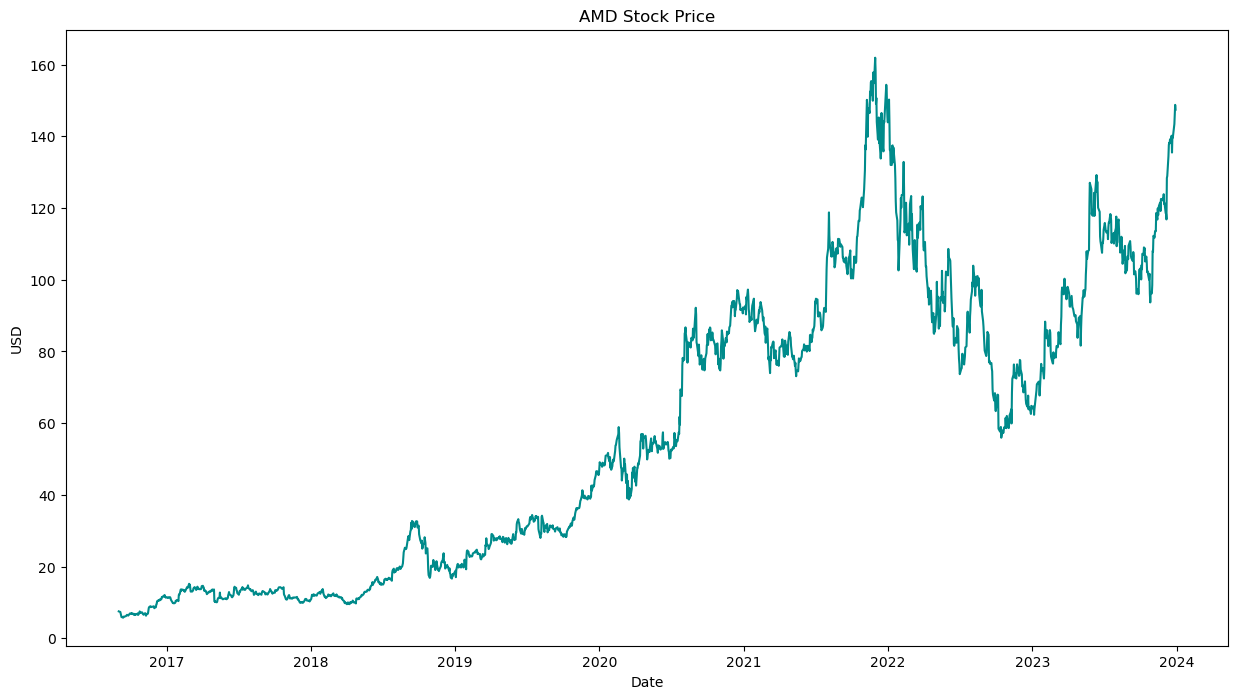

In [65]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(final_df_AMD['Date'], final_df_AMD['Close'], color='#008B8B')
ax.set(xlabel="Date", ylabel="USD", title=f"AMD Stock Price")
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
plt.show()

In [66]:
final_df_AMD.iloc[:, 1:] = pd.concat([final_df_AMD.iloc[:, 1:].ffill()])

C:\Users\User\AppData\Local\Temp\ipykernel_16212\3181032715.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df_AMD.iloc[:, 1:] = pd.concat([final_df_AMD.iloc[:, 1:].ffill()])


In [67]:
AMD = final_df_AMD[['Close', 'Sentiment_score']]

X_AMD = []
y_AMD = []


for i in range(2, len(AMD)):
    
    X_AMD.append(AMD.iloc[i-2:i][['Close', 'Sentiment_score']].values)  
    y_AMD.append(AMD['Close'].iloc[i])    

# Converting the lists into numpy arrays with float type
X_AMD = np.array(X_AMD, dtype=float)  # Shape: (samples, 2, 2)
y_AMD = np.array(y_AMD, dtype=float)  # Shape: (samples,)

# Checking for any missing values
if np.isnan(X_AMD).any() or np.isnan(y_AMD).any():
    raise ValueError("Input data contains NaN values. Please handle missing data before training.")

# Checking the shapes of the arrays to confirm correctness
print("Shape of X_AMD:", X_AMD.shape)  # Expected: (n, 2, 2)
print("Shape of y_AMD:", y_AMD.shape)  # Expected: (n,)

Shape of X_AMD: (1841, 2, 2)
Shape of y_AMD: (1841,)


In [68]:
# Determining the training length (80% of the data)
train_len_AMD = math.ceil(len(AMD) * 0.8)
print("Training samples:", train_len_AMD)

Training samples: 1475


In [69]:
X_AMD_train,y_AMD_train = X_AMD[:train_len_AMD],y_AMD[:train_len_AMD]

In [70]:
X_AMD_train.shape

(1475, 2, 2)

In [71]:
# Defining the LSTM model with correct input_shape
model_AMD = Sequential()
model_AMD.add(LSTM(50, activation='relu', input_shape=(X_AMD_train.shape[1], X_AMD_train.shape[2])))
model_AMD.add(Dense(25))
model_AMD.add(Dense(1))

# Compiling the model
model_AMD.compile(loss='mean_squared_error', optimizer='adam')

# Displaying the model summary
model_AMD.summary()

# Training the model
model_AMD.fit(X_AMD_train, y_AMD_train, epochs=20, batch_size=32, verbose=2)

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,901 (46.49 KB)

 Trainable params: 11,901 (46.49 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
47/47 - 3s - 62ms/step - loss: 2490.1404
Epoch 2/20
47/47 - 0s - 5ms/step - loss: 32.4988
Epoch 3/20
47/47 - 0s - 5ms/step - loss: 6.9970
Epoch 4/20
47/47 - 0s - 5ms/step - loss: 6.3492
Epoch 5/20
47/47 - 0s - 5ms/step - loss: 6.1484
Epoch 6/20
47/47 - 0s - 5ms/step - loss: 6.0614
Epoch 7/20
47/47 - 0s - 4ms/step - loss: 5.9426
Epoch 8/20
47/47 - 0s - 5ms/step - loss: 5.8274
Epoch 9/20
47/47 - 0s - 4ms/step - loss: 5.9288
Epoch 10/20
47/47 - 0s - 6ms/step - loss: 5.9448
Epoch 11/20
47/47 - 0s - 7ms/step - loss: 5.8550
Epoch 12/20
47/47 - 0s - 4ms/step - loss: 5.9132
Epoch 13/20
47/47 - 0s - 4ms/step - loss: 5.7696
Epoch 14/20
47/47 - 0s - 5ms/step - loss: 6.1863
Epoch 15/20
47/47 - 0s - 5ms/step - loss: 5.8631
Epoch 16/20
47/47 - 0s - 5ms/step - loss: 5.7876
Epoch 17/20
47/47 - 0s - 5ms/step - loss: 5.8125
Epoch 18/20
47/47 - 0s - 6ms/step - loss: 5.8043
Epoch 19/20
47/47 - 0s - 5ms/step - loss: 5.8788
Epoch 20/20
47/47 - 0s - 6ms/step - loss: 5.7313


In [72]:
X_AMD_test,y_AMD_test = X_AMD[train_len_AMD-2:],y_AMD[train_len_AMD-2:]

In [73]:
X_AMD_test.shape

(368, 2, 2)

In [74]:
y_AMD_test.shape

(368,)

<Axes: >

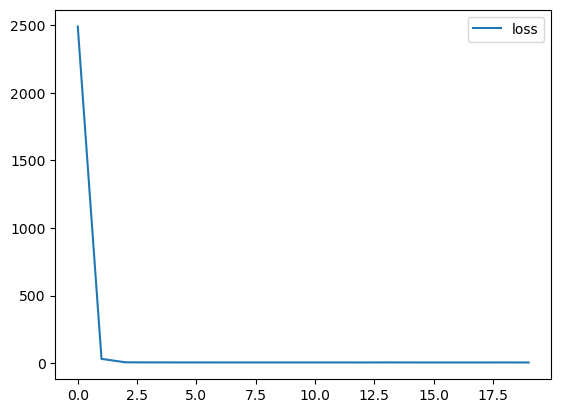

In [75]:
losses_AMD = pd.DataFrame(model_AMD.history.history)
losses_AMD[['loss']].plot()

In [76]:
prediction_AMD = model_AMD.predict(X_AMD_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [77]:
print('Test RMSE for AMD:', np.sqrt(mean_squared_error(y_AMD_test, prediction_AMD)))
print('Test MAPE for AMD:', np.sqrt(mean_absolute_percentage_error(y_AMD_test, prediction_AMD)))

Test RMSE for AMD: 3.442095219141575
Test MAPE for AMD: 0.16755727514545676


In [78]:
# Checking for model accuracy

lstm_train_pred_AMD = model_AMD.predict(X_AMD_train)
lstm_test_pred_AMD = model_AMD.predict(X_AMD_test)
print('Train rmse for AMD:', np.sqrt(mean_squared_error(y_AMD_train, lstm_train_pred_AMD)))
print('Test rmse for AMD:', np.sqrt(mean_squared_error(y_AMD_test, lstm_test_pred_AMD)))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train rmse for AMD: 2.395181621892601
Test rmse for AMD: 3.442095219141575


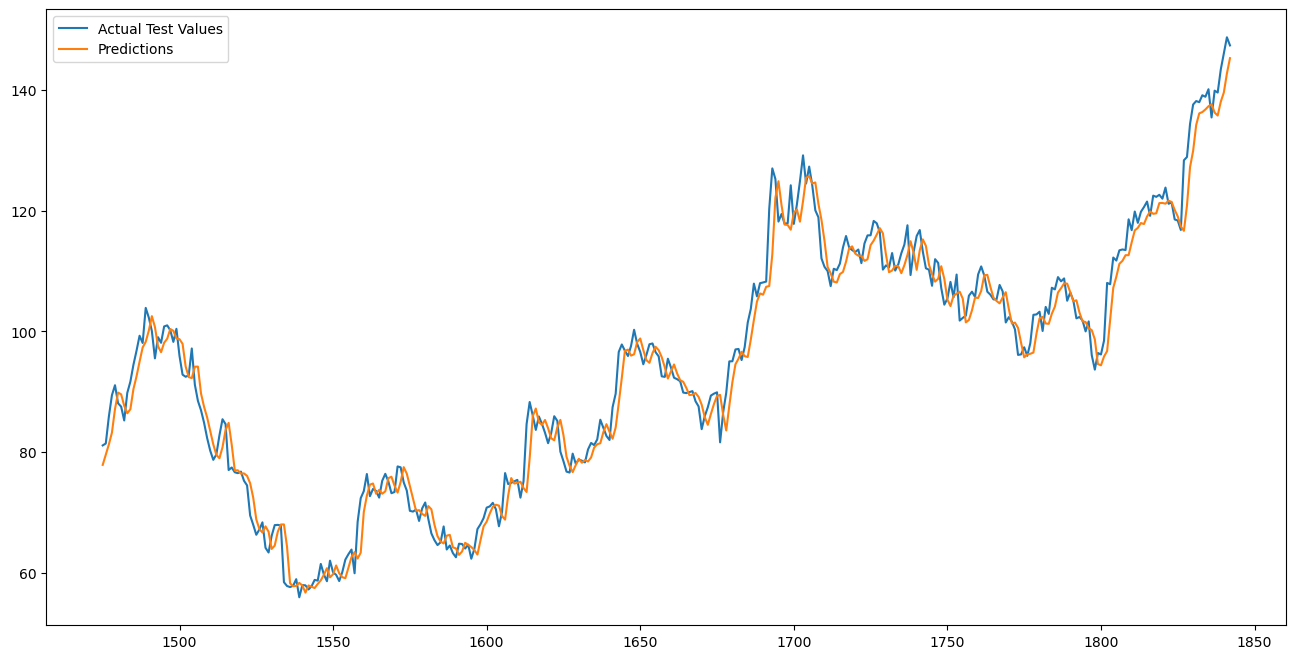

In [79]:
# Plotting the test and the prediction values 

x=df_AMD.iloc[-len(y_AMD_test):]['Date'].values
test_AMD = pd.DataFrame(AMD[train_len_AMD:])
test_AMD['Predictions']=lstm_test_pred_AMD
plt.figure(figsize=(16,8))
# plt.plot(x ,test_AMD['Close'] )
# plt.plot(x ,test_AMD['Predictions'] )
plt.plot(test_AMD[['Close','Predictions']])
plt.legend(['Actual Test Values','Predictions'])
plt.show()

In [80]:
# Resetting the index to default integers

test_AMD = test_AMD.reset_index(drop=True)

variance_AMD = []
for i in range(len(test_AMD)):
    variance = test_AMD['Close'][i] - test_AMD['Predictions'][i]
    variance_AMD.append(variance)

# Converting the list to a DataFrame
variance_AMD = pd.DataFrame(variance_AMD, columns=['Variance'])

# Outputting descriptive statistics
print(variance_AMD.describe())

         Variance
count  368.000000
mean     0.765734
std      3.360410
min     -9.575924
25%     -1.460617
50%      0.621632
75%      2.773485
max     14.246452


### Visualization of train, test and the prediction values in a single plot

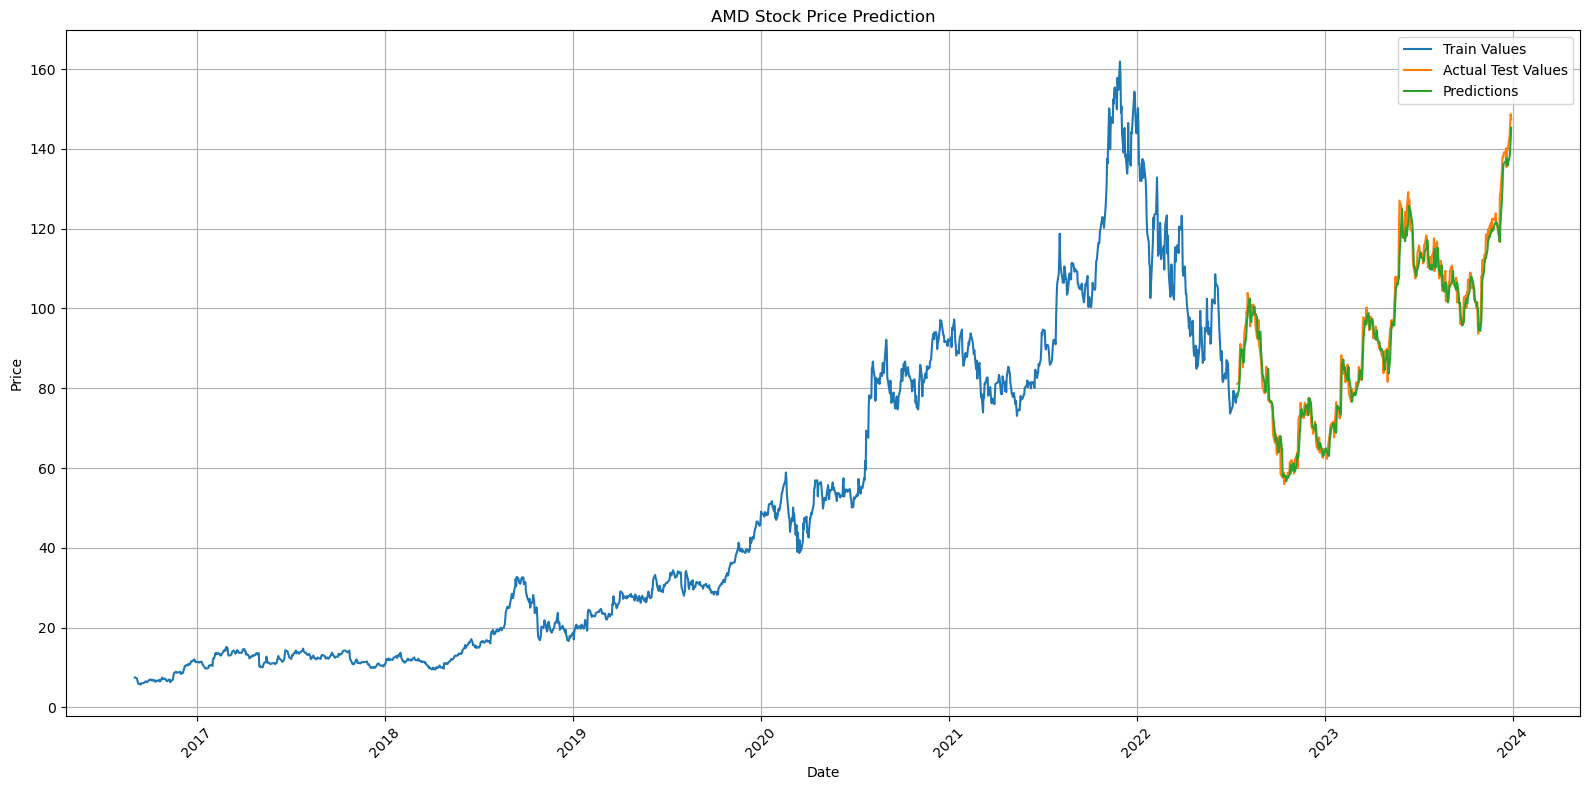

In [82]:
# Creating a dataframe to store actual and predicted values
train_AMD = pd.DataFrame(AMD[:train_len_AMD])
train_AMD['Date'] = final_df_AMD.iloc[:train_len_AMD]['Date'].values
train_AMD['Type'] = 'Train'
 
test_AMD = pd.DataFrame(AMD[train_len_AMD:])
test_AMD['Date'] = final_df_AMD.iloc[train_len_AMD:]['Date'].values
test_AMD['Type'] = 'Test'
test_AMD['Predictions'] = lstm_test_pred_AMD
 
# Creating the plot
plt.figure(figsize=(16,8))
 
# Plotting training values
plt.plot(train_AMD['Date'], train_AMD['Close'], label='Train Values')
 
# Plotting test values
plt.plot(test_AMD['Date'], test_AMD['Close'], label='Actual Test Values')
 
# Plotting predicted values
plt.plot(test_AMD['Date'], test_AMD['Predictions'], label='Predictions')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AMD Stock Price Prediction')
plt.legend(['Train Values', 'Actual Test Values', 'Predictions'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()